# Übung 5

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### In dieser Übung ...

werden Sie einen echten Datenfall bearbeiten, der die Firma Tesla betrifft. In diesem Fall werden Sie sich mit dem Thema *Datenaufbereitung* und dessen Konsequenzen beschäftigen. Nach dieser Aufgabe werden Sie sich noch einmal mit explorativer Analyse und Zusammenhangsmaßen (wie beispielsweise der *Mutual Information*) beschäftigen.

### 5.1 Der Fall Tesla: Autopilot

* In diesem Datenfall üben Sie Ihre Fähigkeiten, Datensätze zu erschließen, aufzubereiten und auf Plausibilität zu prüfen.

Seit wenigen Jahren verstärken verschiedene Unternehmen und Startups ihre Bemühungen, autonome Fahrzeuge zu entwickeln. Solche selbststeuerenden Fahrzeuge versprechen eine Vielzahl neuer Anwendungen und haben das Potenzial, unser Verhältnis zu Autos zu verändern. Manche Visionäre sprechen bereits von "mobility as a service", bei der Autos nicht mehr besessen, sondern per App für eine Fahrt geliehen werden und selbstständig fahren.

Bei der Entwicklung von autonomen Fahrzeugen verfolgen verschiedene Hersteller eine schrittweise Strategie, nach der Assistenzfunktionen zum Parken oder für das Halten der Fahrspur nach und nach den Fahrern zur Verfügung gestellt werden. Tesla stellt den sogenannten *Autopilot* bereit, der das Feature *Autosteer* zum automatischen Halten der Fahrspur enthält.

[Im Jahr 2016 verunglückte Joshua Brown](https://www.nytimes.com/2016/07/02/business/joshua-brown-technology-enthusiast-tested-the-limits-of-his-tesla.html) in Florida in einem Tesla Model S, während das Autosteer Feature aktiviert war. Er war damit der erste (soweit bekannte) Todesfall, der in einem selbstfahrenden Auto eingetreten ist.

Die NHTSA, eine Bundesbehörde der USA im Bereich des Verkehrsministeriums, untersuchte den Fall und forderte Zahlen von Tesla an, die die Sicherheit des Autosteering Features belegen sollten. Anhand dieser Zahlen konnte die Behörde im Jahr 2017 folgende Feststellung machen:

![Abbildung](https://data.bialonski.de/ds/tesla_autosteer_nhtsa.png)

Die Anzahl der Airbag-Auslösungen dient dabei als ein Anhaltspunkt für die Anzahl der Unfälle. Dieser Auswertung zufolge reduziert *Autosteer* die Unfallwahrscheinlichkeit um 40%!

Der dieser Statistik zugrundeliegende Datensatz wurde aufgrund eines Antrags basierend auf dem Informationsfreiheitsgesetz der USA (Freedom of Information Act) verfügbar gemacht und steht Ihnen in dieser Übung zur Verfügung.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/tesla.xlsx).


Wir werden die folgenden Eigenschaften [1-6] untersuchen:

1. Kilometerstand (in Meilen) bevor der Installation von Autosteer ("1l Previous Mileage before Autosteer Install").

   * Dieser Wert wurde abgelesen vor Installation von Autosteer.


2. Kilometerstand (in Meilen) nach der Installation von Autosteer ("1l Next Mileage after Autosteer Install")

   * Dieser Wert wurde abgelesen nach Installation von Autosteer.
   
   
3. Gefahrene Meilen vor Autosteer-Installation ("Miles before Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


4. Gefahrene Meilen nach Autosteer Installation ("Miles after Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


5. Airbag-Auslösungen vor Autosteer-Installation ("Airbag events before Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


6. Airbag-Auslösungen nach Autosteer-Installation ("Airbag events after Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


**Ihre Aufgaben**

Für die nachfolgenden Aufgaben benötigen Sie Ihre Neugier und etwas detektivisches Gespür.

(1) Betrachten Sie zunächst mit einer Tabellenkalkulation den oben hinterlegten Datensatz. Suchen Sie nach den oben erwähnten sechs Eigenschaften. 

   * Importieren Sie nun mithilfe von Pandas die oben sechs erwähnten Eigenschaften aus der Excel-Datei. Dabei kann es hilfreich sein, das entsprechende Sheet der Excel-Datei in Pandas anzugeben, aus dem Sie die Daten importieren müssen.

In [113]:
import pandas as pd
df = pd.read_excel("tesla.xlsx", 
                   sheet_name="PE16_007_PRODUCTION DATA", 
                   usecols=["1l Previous Mileage before Autosteer Install",
                            "1l Next Mileage after Autosteer Install",
                            "Miles before Autosteer",
                            "Miles after Autosteer",
                            "Airbag events before Autosteer",
                            "Airbag events after Autosteer"])
df = df.loc[:43780, :]

(2) Von wie vielen Fahrzeugen wurden Daten erhoben? Nennen Sie die Anzahl der Fahrzeuge, indem Sie sie aus Ihren Daten aus Teilaufgabe (1) bestimmen.

Es gibt insgesamt 43781 Fahrzeuge.

(3) Reproduzieren Sie die beiden Zahlen der NHTSA Behörde der USA, d.h. berechnen Sie die Anzahl der Airbag-Auslösungen vor Autosteer-Installation pro 1 Million gefahrener Meilen und nach Autosteer-Installation pro 1 Million gefahrener Meilen und geben Sie sie an.

   * Wenn Sie nicht auf die Zahlen der NHTSA kommen, lesen Sie diesen [Rot-13](https://rot13.de/index.php) kodierten Hinweis: Süe qvr Orerpuahat ahgmra Fvr ovggr qvr Qngraervura qerv ovf frpuf jvr vz Nofpuavgg "Vuer Qngra" natrtrora.

In [114]:
df.fillna(0, inplace=True)
print(df[df['Airbag events before Autosteer'] != 0]['Airbag events before Autosteer'].sum() * 1e6/ df['Miles before Autosteer'].sum())
print(df[df['Airbag events after Autosteer'] != 0]['Airbag events after Autosteer'].sum() * 1e6/ df['Miles after Autosteer'].sum())

1.3274035028974518
0.8139719057681513


(4) Bis hierher stimmen unsere Analysen mit der US-Behörde überein. Doch es gibt Ungereimtheiten in den Daten. Betrachten Sie dazu die Datenreihen 1 und 2, d.h. die Kilometerstände (in Meilen) der Fahrzeuge vor und nach der Installation von Autosteer. Vor der Installation von Autosteer wird der Kilometerstand erhoben; nach der Installation von Autosteer wird der Kilometerstand erhoben:

1. Welche Erwartungshaltung haben Sie an die beiden Datensätze? (1 Satz)

2. Explorieren Sie diese beiden Datensätze (Stichwort: Explorative Analyse). Was fällt Ihnen auf? (1 Satz)

Wenn Sie partout nicht mehr weiter kommen, gebe ich Ihnen einen Tipp: Jraa Fvr ibe qre Vafgnyyngvba iba Nhgbfgrre qra Xvybzrgrefgnaq nofpuervora jüeqra, haq anpu qre Vafgnyyngvba rorasnyyf qra Xvybzrfgrefgnaq abgvrera, jüeqra fvpu qvr orvqra Xvybzrgrefgäaqr hagrefpurvqra bqre fbyygra fvr tyrvpu frva?

Wir haben die Erwartung, dass diese 2 Datensätze nicht  unterscheiden sollten.

In [115]:
df.loc[:, ["1l Previous Mileage before Autosteer Install", "1l Next Mileage after Autosteer Install"]].fillna(0, inplace=True)
df[["1l Previous Mileage before Autosteer Install", "1l Next Mileage after Autosteer Install"]].describe()

,1l Previous Mileage before Autosteer Install,1l Next Mileage after Autosteer Install
count,43781.000000,43781.000000
mean,1479.823142,4532.010621
std,3695.992784,6156.846205
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,2092.000000
75%,238.000000,7019.000000
max,57627.000000,97066.000000


Die Daten unterscheiden sich sehr viel.

(5) Problem 1: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie genau feststellen konnten, zu welchem Kilometerstand Autosteer tatsächlich installiert worden sein muss. Betrachten Sie **nur** die Fahrzeuge aus dieser Menge, für die tatsächlich gefahrenen Kilometer (mehr als 0) vor der Autosteer-Installation ausgewiesen wurden.

* Wie viele Fahrzeuge erfüllen die gerade genannten Kriterien?
* Bestimmen Sie die Anzahl der Airbag-Auslösungen pro gefahrenen 1 Million Meilen vor und nach der Installation von Autosteer. Geben Sie diese Zahlen an. Was stellen Sie fest? 
* Vergleichen Sie Ihre Zahlen mit den oben angegebenen Zahlen der NHTSA. Sehen Sie gleiche oder unterschiedliche Tendenzen?

In [116]:
df_determined_installation = df[df["1l Previous Mileage before Autosteer Install"] == df["1l Next Mileage after Autosteer Install"]] # Miles before and after should be equal

In [117]:
df_problem_1 = df_determined_installation[df_determined_installation['Miles before Autosteer'] > 0] # Only with mileage before > 0
print(f'Anzahl von Fahrzeugen: {len(df_problem_1.index)}')

print(f'Anzahl der Airbag-Auflösungen pro gefahrenen 1 Million Meilen vor Installation: '
      f'{df_problem_1[df_problem_1['Airbag events before Autosteer'] != 0]['Airbag events before Autosteer'].sum() * 1e6 / df['Miles before Autosteer'].sum()}')
print(f'Anzahl der Airbag-Auflösungen pro gefahrenen 1 Million Meilen nach Installation: '
      f'{df_problem_1[df_problem_1['Airbag events after Autosteer'] != 0]['Airbag events after Autosteer'].sum() * 1e6/ df['Miles after Autosteer'].sum()}')

Anzahl von Fahrzeugen: 5719
Anzahl der Airbag-Auflösungen pro gefahrenen 1 Million Meilen vor Installation: 0.4939175824734704
Anzahl der Airbag-Auflösungen pro gefahrenen 1 Million Meilen nach Installation: 0.279802842607802


Die Anzahl der Airbag-Auflösungen ist geringer als bei NHTSA.

(6) Problem 2: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie genau feststellen konnten, zu welchem Kilometerstand Autosteer tatsächlich installiert worden sein muss. Betrachten Sie nun alle Fahrzeuge aus dieser Menge, die **keine gefahrenen Kilometer vor der Autosteer-Installation** aufweisen.

* Wie viele Fahrzeuge erfüllen die gerade genannten Kriterien?
* Wie viele Airbag-Auslösungen vor der Installation von Autosteer beobachten Sie für diese Gruppe von Fahrzeugen?
* Welche Auswirkung hat Ihre Beobachtung auf die Größe der Anzahl an Airbag-Auslösungen pro 1 Million gefahrener Meilen, wie sie die NHTSA berechnet hat?

In [118]:
df_problem_2 = df_determined_installation[df_determined_installation["Miles before Autosteer"] == 0]
print(f'Anzahl von Fahrzeugen: {len(df_problem_2.index)}')

print(f'Anzahl der Airbag-Auflösungen {df_problem_2['Airbag events before Autosteer'].sum()}')

Anzahl von Fahrzeugen: 14877
Anzahl der Airbag-Auflösungen 3.0


Wenn keine gefahrenen Kilometer vor der Autosteer-Installation vorhanden sind, könnte dies bedeuten, dass diese Fahrzeuge entweder neu oder nur sehr wenig gefahren wurden, was wiederum die Gesamtzahl der gefahrenen Meilen beeinflusst. Daher würde die Beobachtung wahrscheinlich zu einer niedrigeren Anzahl von Airbag-Auslösungen pro 1 Million gefahrener Meilen führen.

(7) Problem 3: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie **nicht** genau feststellen können, zu welchem Kilometerstand Autosteer tatsächlich installiert wurde. Betrachten Sie **nur** die Fahrzeuge aus dieser Menge, für die tatsächlich mehr als 0 gefahrene Kilometer vor der Autosteer-Installation ausgewiesen wurden.

1. Wie viele Autos sind in dieser Menge enthalten? Wie viele Airbag-Auslösungen sind in dieser Menge enthalten?
2. Bestimmen Sie die Gesamtanzahl der gefahrenen Meilen über alle Fahrzeuge dieser Menge, die zwischen dem Kilometerstand vor Autosteer-Installation und nach Autoinstallation gefahren wurden. Dies sind die "Gap"-Meilen, bei denen wir nicht wissen, zu welcher exakten Kilometerstandszahl Autosteer installiert wurde.
3. Bestimmen Sie die Gesamtanzahl aller Meilen dieser Menge, die vor der Autosteer-Installation gefahren wurden. 
4. Vergleichen Sie die Zahlen aus Schritt 7.2 und 7.3: Ist die gefahrene Gesamtmeilenzahl vor Autosteer-Installation deutlich größer oder kleiner als die Gesamtmeilenzahl der "Gap"-Meilen?

Welchen Schluss ziehen Sie für die Validität der NHTSA Untersuchung aus Ihren Beobachtungen aus diesem Schritt? (1-3 Sätze).

In [119]:
df_not_determined_installation = df[df["1l Previous Mileage before Autosteer Install"] != df["1l Next Mileage after Autosteer Install"]]

In [120]:
df_problem_3 = df_not_determined_installation[df_not_determined_installation['Miles before Autosteer'] > 0]
# Question 1
print(f'Anzahl von Fahrzeugen: {len(df_problem_3.index)}')
print(f'Anzahl der Airbag-Auflösungen vor Installation: {df_problem_3['Airbag events before Autosteer'].sum()}')
print(f'Anzahl der Airbag-Auflösungen nach Installation: {df_problem_3['Airbag events after Autosteer'].sum()}\n')

# Question 2
difference_sum= df_problem_3['1l Next Mileage after Autosteer Install'] - df_problem_3['1l Previous Mileage before Autosteer Install']
print(f'Gesamtanzahl der gefahrenen Meilen (Differenz): {difference_sum.sum()}')

# Question 3
print(f'Gesamtanzahl der Meilen vor der Autosteer-Installation: {df_problem_3['Miles before Autosteer'].sum()}')

Anzahl von Fahrzeugen: 8920
Anzahl der Airbag-Auflösungen vor Installation: 36.0
Anzahl der Airbag-Auflösungen nach Installation: 45.0

Gesamtanzahl der gefahrenen Meilen (Differenz): 57900319.0
Gesamtanzahl der Meilen vor der Autosteer-Installation: 22726819


Die Anzahl der Meilen vor der Installation ist deutlich kleiner, als Anzahl von "Gap" Meilen.

(8) Problem 4: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie **nicht** genau feststellen können, zu welchem Kilometerstand Autosteer tatsächlich installiert wurde. Betrachten Sie **nur** die Fahrzeuge aus dieser Menge, für die nur 0 gefahrene Kilometer vor der Autosteer-Installation ausgewiesen wurden.

1. Wie viele Autos sind in dieser Menge enthalten?
2. Wie viele Airbag-Auslösungen können Sie vor und nach der Autosteer-Installation feststellen?

Wie deuten Sie Ihre Beobachtungen hinsichtlich der Validität der NHTSA Untersuchung? (1-3 Sätze)

In [121]:
df_problem_4 = df_not_determined_installation[df_not_determined_installation['Miles before Autosteer'] == 0]
print(f'Anzahl von Fahrzeugen: {len(df_problem_4.index)}')
print(f'Anzahl der Airbag-Auflösungen vor Installation: {df_problem_4['Airbag events before Autosteer'].sum()}')
print(f'Anzahl der Airbag-Auflösungen nach Installation: {df_problem_4['Airbag events after Autosteer'].sum()}\n')

Anzahl von Fahrzeugen: 14265
Anzahl der Airbag-Auflösungen vor Installation: 15.0
Anzahl der Airbag-Auflösungen nach Installation: 47.0



(9) Abschluss: Betrachten Sie Ihre Ergebnisse zu Problemen 1-4. Lässt sich aufgrund der vorliegenden Zahlen die Aussage treffen, dass durch Autosteer die Anzahl der Airbag-Auslösungen pro gefahrene 1 Million Meilen zurückgegangen ist und damit das Fahren sicherer geworden ist? Argumentieren Sie in wenigen Sätzen.

Ich lasse hier den link https://www.heise.de/autos/artikel/Rechenfehler-Tesla-Autosteer-senkt-Unfallrate-nicht-4303949.html

## 5.2 Multivariate explorative Analyse II (Palmer Pinguine & Parallel Coordinates Plots)

In dieser Übung untersuchen Sie Daten verschiedener Pinguin-Gattungen, die während einer Forschungsmission in der Antarktis an der [Palmer-Station](https://de.wikipedia.org/wiki/Palmer-Station) gesammelt wurden. Der Datensatz stammt aus einer [Publikation](https://doi.org/10.1371/journal.pone.0090081), die das Futtersuchverhalten der Tiere untersuchte. Sie werden die Daten mithilfe von [**Parallel Coordinates Plots**](https://de.wikipedia.org/wiki/Parallele_Koordinaten) (PCPs, ||-Plots) untersuchen. PCPs sind wirkungsvolle Instrumente für eine Exploration höherdimensionaler Räume, die Sie im Rahmen dieser Übung kennenlernen werden. Sie spielen in vielen explorativen Analysen eine Rolle, beispielsweise auch bei der [Parameterexploration](https://web.archive.org/web/20240423104335/https://docs.wandb.ai/guides/app/features/panels/parallel-coordinates) zum Training tiefer neuronaler Netze.

Es begrüßen Sie:

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" alt="Palmer Penguins" width="600" style="background-color: white"/>

**Hinweis**

- Für diese Übung müssen Sie die Bibliotheken [hiplot](https://github.com/facebookresearch/hiplot) und [seaborn](https://seaborn.pydata.org/installing.html) installieren, sollten Sie sie noch nicht installiert haben.


(1) Importieren Sie den Datensatz in einen Pandas DataFrame.

- URL des Datensatzes: `https://data.bialonski.de/ds/palmerpenguins.csv`

In [122]:
palmerpenguins = pd.read_csv('palmerpenguins.csv')
palmerpenguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0


(2) Untersuchen Sie den Datensatz und beantworten Sie bitte folgende Fragen:
- Welche Features sind enthalten? 
- Wie viele Datenpunkte gibt es? 
- Wie viele Klassen (`species`) gibt es?
- Wie viele Datenpunkte gibt es pro Klasse?

In [123]:
features = [f for f in palmerpenguins.columns]
print(f'Features sind: {features}')

Features sind: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [124]:
print(f'Es gibt insgesamt {len(palmerpenguins.index)} Datenpunkten')

Es gibt insgesamt 344 Datenpunkten


In [125]:
species = [s for s in palmerpenguins['species'].unique()]
print(f'Insgesamt gibt es {len(species)} species: {species}')

Insgesamt gibt es 3 species: ['Adelie', 'Gentoo', 'Chinstrap']


In [126]:
print(palmerpenguins.groupby('species')['island'].count())

species
Adelie       152
Chinstrap     68
Gentoo       124
Name: island, dtype: int64


(3) Erstellen Sie einen Scatter-Matrix-Plot des oben beschriebenen Datensatzes, **wobei jeder Datenpunkt durch eine Farbe entsprechend der Spezies gekennzeichnet wird**. <br/>
Verwenden Sie dazu die Bibliothek `seaborn` und die Funktion [`pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

*Hinweis: `pairplot` interpretiert die numerischen Spalten des Datensatzes automatisch als Features. Aus diesem Grund erscheinen nicht zwingend alle Spalten im Scatter-Matrix-Plot.*

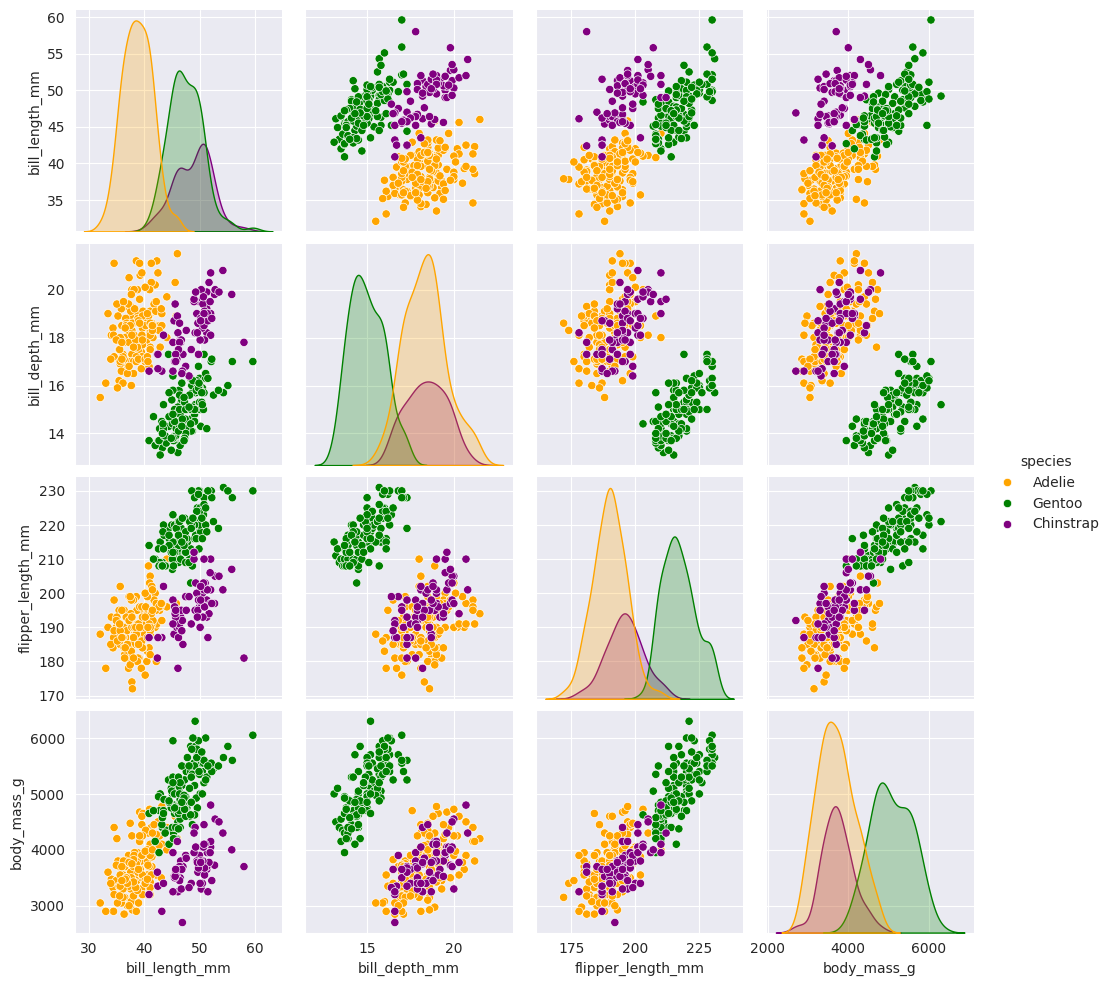

In [127]:
import seaborn as sns
colors = {'Adelie' : 'orange', 'Gentoo' : 'green', 'Chinstrap' : 'purple'}

sns.pairplot(palmerpenguins, hue='species', palette=colors)

*Falls Sie wissen möchten, was es mit dem sogenannten "Bill" auf sich hat:*

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" alt="Palmer Penguins" width="600"/>

(4) Die drei Pinguingattungen erscheinen im Scatter-Matrix-Plot der vorherigen Teilaufgabe als "Punktwolken" (mehr dazu in einer späteren Vorlesungseinheit zum Thema *Clustering*).

- Versuchen Sie nun, die drei Gattungen mithilfe sogenannter "Bounding Boxes" in den Plots zu identifizieren. Suchen Sie dazu nach Featurepaaren, in denen sich die Klassen gut voneinander unterscheiden lassen. Für jede "Bounding Box" benötigen Sie jeweils ein Intervall für die x- und y-Achse, welche die Punktwolke einer Gattung möglichst gut einschließt. 

Fiktives Beispiel:
- Gattung A: `body_mass_g` $\in [3000, 5000]$ und `flipper_length_mm` $\in [170, 200]$

##### Plot x=`bill_depth_mm` y=`bill_length_mm`
- Adelie: `bill_depth_mm` $\in [15, 22]$ und `bill_length_mm` $\in [32, 46]$
- Chinstrap: `bill_depth_mm` $\in [16, 21]$ und `bill_length_mm` $\in [40, 58]$
- Gentoo: `bill_depth_mm` $\in [13, 17.5]$ und `bill_length_mm` $\in [40, 60]$

##### Plot x=`flipper_length_mm` y=`bill_length_mm`
- Adelie: `flipper_length_mm` $\in [172, 210]$ und `bill_length_mm` $\in [32, 46]$
- Chinstrap: `flipper_length_mm` $\in [178, 212]$ und `bill_length_mm` $\in [40, 58]$
- Gentoo: `flipper_length_mm` $\in [200, 231]$ und `bill_length_mm` $\in [40, 60]$


(5) Erstellen Sie einen interaktiven Parallel Coordinates Plot (||-Plot) des oben beschriebenen Datensatzes. <br/>

- Sollten Sie keinen interaktiven Plot erstellen können, bitten wir Sie, für diese Übung in einen anderen Editor (wie Jupyter Notebook oder Jupyter Lab) zu wechseln.

1. Erstellen Sie einen ||-Plot mit der Bibliothek [`hiplot`](https://ai.meta.com/blog/hiplot-high-dimensional-interactive-plots-made-easy/) und den Funktionen [`Experiment.from_dataframe`](https://facebookresearch.github.io/hiplot/py_reference.html) sowie [`Experiment.display`](https://facebookresearch.github.io/hiplot/py_reference.html#hiplot.Experiment.display). 
2. Nutzen Sie die Methode `colorby`, um das Feature `species` für die Farbkodierung auszuwählen. Die Linien Ihres Plots werden dann gemäß der Pinguingattung eingefärbt.
3. **Wichtig:** Sie müssen sich mit der (nicht direkt ersichtlichen) interaktiven Bedienung des Plots vertraut machen. Klicken Sie dazu im Plot oben auf "Help" und durchlaufen Sie das dort hinterlegte Tutorial.

In [128]:
import hiplot as hip

exp = hip.Experiment.from_dataframe(palmerpenguins)
exp.colorby = 'species'
exp.display()

<IPython.core.display.Javascript object>

(6) Versuchen Sie, mithilfe von geschicktem Slicing der verschiedenen Features im Parallel Coordinates Plot die jeweiligen Gattungen zu identifizieren. Orientieren Sie sich gerne an Ihren Ergebnissen bzw. Intervallen aus Teilaufgabe (4).

(7) Versuchen Sie nun, bessere "Bounding Boxes" zu finden, um die Gattungen besser voneinander zu trennen. Betrachten Sie dabei insbesondere Features, die in der vorherigen Aufgabe nicht verwendet wurden. *(Zur Erinnerung: bisher wurden nur numerische Features betrachtet.)*

Mithilfe von Parallel Plot kann man deutlich sehen, dass Gentoo wohnen nur auf der Biscoe, Chinstrap auf Dream und Adelie sind auf allen 3 Inseln present.

(8) Vergleichen Sie die beiden Visualisierungen und diskutieren Sie die Vor- und Nachteile der beiden Ansätze. 

Vorteile von Parallelplots:
- Parallelplots ermöglichen die gleichzeitige Visualisierung mehrerer Variablen
- Sie können hilfreich sein, um die Dimensionen eines Datensatzes zu reduzieren
- Parallelplots können sowohl kontinuierliche als auch kategoriale Variablen darstellen

Nachteile sind:
- Bei großen Datensätzen können Parallelplots überfüllt und schwer zu interpretieren sein
- Unterschiedliche Skalen zwischen den Variablen können die Interpretation erschweren
- Die Interpretation von Parallelplots kann komplexer werden

Vorteile von scatter plot:
- Scatter Plots ermöglichen die Visualisierung einzelner Beziehungen zwischen zwei Variablen
- Sie sind in der Regel einfacher zu verstehen
- Scatter Plots können dabei helfen, Ausreißer zu identifizieren

Nachteile:
- Scatter Plots visualisieren jeweils nur zwei Variablen, daher können sie Muster über mehrere Variablen hinweg nicht direkt anzeigen.
- Sie bieten keine Möglichkeit zur Dimensionenreduktion wie Parallelplots
- Unterschiedliche Skalierungen können die Interpretation zwischen den Variablen erschweren

### 5.3 Zusammenhangsmaße (Teil 1): Spearman vs Pearson

In dieser Übung werden wir synthetische Daten generieren und damit Spearmans- und Pearsons Korrelationskoeffizienten untersuchen.

**Ihre Daten**

Bei den Daten handelt es sich um die berühmte Fibonacci-Folge, eine unendliche Folge, die vom italienischen Mathematiker Leonardo Fibonacci im 12. Jahrhundert zur Beschreibung der Entwicklung einer Kaninchenpopulation aufgestellt wurde. 

Sei $y_n$ das n-te Glied der Folge und seien $y_1 = 0$ und $y_2 = 1$. Dann ist $y_n$ für $n\geq 3$ definiert als $$y_n = y_{n-1} + y_{n-2}.$$


**Ihre Aufgaben**

Nutzen Sie hauptsächlich Numpy (und ein wenig Pandas) zur Bearbeitung dieser Aufgaben.

(1) Schreiben eine Funktion, die für einen gegebenen Wert $n\in\mathbb{N}$ das Glied der Fibonacci-Folge zurückgibt.

In [129]:
import numpy as np

# Fibonacci matrix method
#        ^ n
# [[1, 1],     [[fib(n+1), fib(n)], 
#  [1, 0]]  ->  [fib(n), fib(n-1)]]
#                      
def fib(n: int) -> int:
    if n == 1:
        return 0

    return helper(n)[0][1]

def helper(n: int) -> list[[int]]:
    A = np.array([[1, 1], 
                  [1, 0]])
    if n == 2:
        return A
    
    B = A
    for i in range(n - 2):
        B = np.matmul(B, A)
    return B


(2) Erzeugen Sie Ihren Datensatz. Sei $n = \{1, \ldots, 30\}$. Erstellen Sie mit Ihrer Funktion aus Schritt (1) die Folge $y_n$ für alle $n$. Sie erhalten damit Wertepaare $(n, y_n)$, die Sie z.B. in einem Numpy Array hinterlegen können.

In [130]:
data = np.array([fib(n) for n in range(1, 31)])
print(data)

[     0      1      1      2      3      5      8     13     21     34
     55     89    144    233    377    610    987   1597   2584   4181
   6765  10946  17711  28657  46368  75025 121393 196418 317811 514229]


(3) Schlagen Sie die Definition des Pearson Korrelationskoeffizienten in der Vorlesung nach und implementieren Sie eine Funktion, die zwei Datenreihen entgegennimmt und Pearsons Korrelationskoeffizient zurückgibt.

In [131]:
def pearson(x: list, y: list) -> float:
    x_np = np.array(x)
    y_np = np.array(y)
    

    return float(np.corrcoef(x_np, y_np)[0, 1])

(4) Bestimmen Sie dann den Pearson Korrelationskoeffizienten zwischen der Datenreihe ${n}$ und ${y_n}$ mithilfe Ihrer Funktion aus (3) und notieren Sie sich den Wert.

In [132]:
print(pearson([i for i in range(1, 31)], data))

0.6034880493240204


(5) Schlagen Sie in den Vorlesungsfolien die Definition von Spearmans Korrelationskoeffizienten nach. Kopieren Sie sich den Code aus Schritt (3) und erzeugen Sie daraus eine neue Funktion, die Spearmans Korrelationskoeffizienten implementiert. Um die Ränge zu berechnen, können Sie Pandas `rank` Funktion nutzen.

In [133]:
from scipy.stats import rankdata
def spearman(x: list, y: list) -> float:
    x_ranks = rankdata(x, method='average').astype(int)
    y_ranks = rankdata(y, method='average').astype(int)
    
    return float(np.corrcoef(x_ranks, y_ranks)[0, 1])

(6) Nutzen Sie Ihre Funktion aus Schritt (5), um Spearmans Korrelationskoeffizient zwischen $n$ und $y_n$ zu berechnen, die Sie in Schritt (2) erzeugt hatten.

In [134]:
print(spearman([i for i in range(1, 31)], data))

0.9998026728270686


(7) Vergleichen Sie den Wert von Pearsons Korrelationskoeffizienten (aus Schritt 4) mit dem Wert von Spearmans Korrelationskoeffizienten (aus Schritt 6). Was fällt Ihnen auf? (1 Satz). Was ist die Ursache für den Unterschied zwischen beiden Werten, den Sie feststellen? (1-3 Sätze)  

Spearman-Koeffizienten bedeutet eine sehr starke monotonische Beziehung zwischen X und Y. Dies ist nicht überraschend, da die Fibonacci-Folge ein deutliches monotonisches Muster aufweist. Der Pearson-Koeffizient deutet jedoch auf eine moderate lineare Beziehung hin. Dieser Unterschied zwischen den beiden Koeffizienten liegt wahrscheinlich darin begründet, dass die Fibonacci-Folge keine lineare, sondern eine exponentielle Progression aufweist. Daher ist die Beziehung in Bezug auf die Ordnung (Spearman) stark, aber nicht so stark in Bezug auf die lineare Anpassung (Pearson).

### 5.4 Zusammenhangsmaße (Teil 2): Mutual Information, Pearson, Spearman

In dieser Übung werden Sie Zusammenhänge zwischen verschiedenen Datensätzen mithilfe der Zusammenhangsmaße untersuchen, die Sie in der Vorlesung kennengelernt haben. Daneben werden Sie vertraut mit dem Importieren von Daten aus Excel-Tabellen.

* Nutzen Sie Pandas und Numpy zum Bearbeiten der folgenden Aufgaben.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/dependency_data.xlsx).

**Ihre Aufgaben**

(1) Importieren Sie die Daten mithilfe der [Funktionalität](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) von Pandas in einen DataFrame.

* Visualisieren Sie die Daten zunächst **nicht** (aus didaktischen Gründen). Sie werden die Daten erst im Teilschritt (5) visualisieren.

In [135]:
df = pd.read_excel('dependency_data.xlsx', index_col=0)
df.head()

,X,y1,y2,y3,y4
0,0.097627,1.017967,-0.338989,9.902373,-0.965421
1,0.430379,0.102369,-0.446531,9.569621,0.133793
2,0.205527,0.823668,0.354986,9.794473,0.266585
3,0.089766,1.093290,0.316893,9.910234,-0.749156
4,-0.152690,0.635302,0.391532,10.152690,0.220924


(2) Wir betrachten im Folgenden Paare von Spalten, beispielsweise $(X, y_1)$, die wir *Datenreihenpaare* nennen werden.

Berechnen Sie mit Ihrem Code aus Übung 4 den Pearson- sowie den Spearman-Korrelationskoeffizienten für die Datenreihenpaare ...

1. $(X, y_1)$
2. $(X, y_2)$
3. $(X, y_3)$
4. $(X, y_4)$

In [136]:
for i in range(1, 5):
    print(f'(X, y_{i}):')
    print(f'Pearson: {pearson(df['X'], df[f'y{i}'])}')
    print(f'Spearman: {spearman(df['X'], df[f'y{i}'])}\n')

(X, y_1):
Pearson: 0.017645275308514445
Spearman: 0.04192822192822193

(X, y_2):
Pearson: 0.0347788064079532
Spearman: 0.03621319221319222

(X, y_3):
Pearson: 0.32904339977763764
Spearman: -0.7269940869940871

(X, y_4):
Pearson: 0.018458017254591712
Spearman: 0.018700386700386703



(3) Beantworten Sie - ohne zu Visualisieren - anhand der Koeffizienten aus Teilaufgabe (2):

* Welche der Datenreihenpaare zeigen Korrelationen? Welche Datenreihenpaare sind unkorreliert?
* Gibt es Widersprüche zwischen den Korrelationskoeffizienten? Falls ja, für welche Daten?

Die Paar $(X, y_3)$ zeigt eine mittlere positive lineare Korrelation und streng negative monotone Korrelation. Alle andere Paare zeigen schwache sowohl lineare als auch monotone Korrelation. 

(4) Bestimmen Sie nun für die in Teilaufgabe (2) genannten Datenreihenpaare jeweils die Mutual Information. Ausgehend von Ihren Werten für die Mutual Information beantworten Sie bitte: Zwischen welchen Datenreihenpaaren gibt es Zusammenhänge, zwischen welchen Datenreihenpaare gibt es keine (großen) Zusammenhänge?

* Nutzen Sie für die Bestimmung der *Mutual Information* die [Implementierung](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) der scikit-learn Bibliothek. Hintergrund: Eine robuste Schätzung der Mutual Information ist anspruchsvoll und wurde von verschiedenen Forschungsgruppen untersucht. Einer der [weltweit bekanntesten Schätzer](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.69.066138) der Mutual Information wurde von Forschern des Forschungszentrum Jülichs (am John von Neumann-Institut für Computing) im Jahr 2004 publiziert und wird auch von scikit-learn implementiert.

In [137]:
from sklearn.feature_selection import mutual_info_regression
print(mutual_info_regression(X=df.loc[:, 'y1':], y=df['X']))

[0.84637242 0.88664582 2.54890351 0.02066885]


Zwischen $(X, y_4)$ gibt es keine Zusammenhänge, zwischen anderen doch.

(5) Visualisieren Sie nun alle Datenreihenpaare aus Teilaufgabe (2) in Scatterplots und beschriften Sie jeden Plot mit den entsprechenden Werten des Pearson-, Spearman-Korrelationskoeffizienten und dem Wert der Mutual Information.

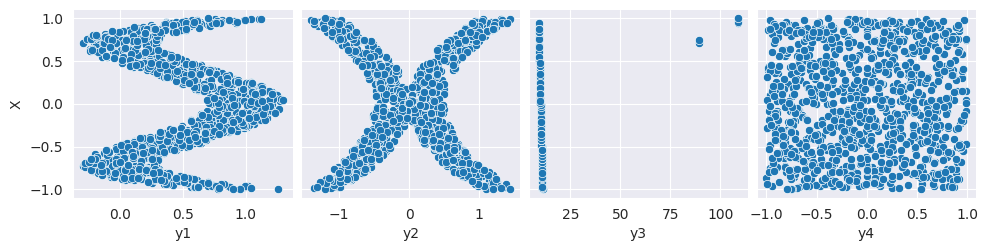

In [140]:
sns.pairplot(df, kind="scatter", x_vars=["y1","y2","y3","y4"], y_vars=["X"]) # Transposed

(6) Begründen Sie nun für jedes Datenreihenpaar, warum Sie Korrelationen oder keine Korrelation durch Pearson, Spearman und die Mutual Information angezeigt bekommen.

* Begründen Sie zusätzlich, warum Sie für Datenreihenpaar $(X, y_3)$ so unterschiedliche Ergebnisse für den Pearson- und den Spearman-Korrelationskoeffizienten erhalten haben.

$(X, y_1)$:
Die Pearson- und Spearman sind näher zu $0$, weil die Grafik hat 4 Teile, die ergänzen sich zu $0$. Aber man kann auch sehen, dass der Grafik eine Struktur hat, so ein Zusammenhang zwischen 2 Variablen bestimmt.

$(X, y_2)$:
Genauso wie (1), nur haben wir hier 2 Teilen.

$(X, y_3)$:
Man sieht hier deutlich, dass ohne ein paar Ausreißer die Werte sind monoton linear fallend (Pearson ~ 0.3, Spearman ~ -0.72). Die Mutual Information ist dann sehr groß.

$(X, y_4)$:
Hier sieht man nur random Werte, kein Zusammenhang, dann ist alle 3 Werte ~0